# Dataset preprocessing

This notebook provides instructions on how to download and preprocess the three datasets used in the paper experiments, Communities and Crimes, Fifa19 and Musk. Throughout the code, these datasets are referred to as `communities_and_crime_v2`, `fifa19_v2` and `musk`, respectively. Note that in the code, you may find references to `communities_and_crime` and `fifa19` in addition to `communities_and_crime_v2` and `fifa19_v2`. Examples of such references include assertions checking the validity of dataset names. `communities_and_crime` and `fifa19` are differently pre-processed versions of the Communities and Crime and Fifa19 datasets which we used in preliminary experiments. The main differences is that we discarded discrete ordinal columns in the case of Communities and Crime and did not remove redundant columns in the case of Fifa19. These differently pre-processed versions were used in preliminary experiments but were not used in the final experiments. To avoid any confusion, and because the final experiments only use `communities_and_crime_v2`, `fifa19_v2`, and `musk`, we do not include here the pre-processing code for generating `communities_and_crime` and `fifa19`.

The instructions are provided, in order, for: `communities_and_crime_v2`, `fifa19_v2`, and `musk`. Each dataset will be saved in a directory with the corresponding name which is located in the `../datasets` directory. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

# Use this to load our modules.
module_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
datasets_dir = '../datasets'

For each dataset, we  run the following steps:
    
Step 1. We manually select the real-valued columns (discrete ordinal and continuous), discarding the categorical columns.

Step 2. We manually select the output variables (e.g., crime-related for the Communities and Crimes dataset).

Step 3. We convert the output variable to a binary one.

Step 4. We save the dataset under a standard format (common across all the datasets).

# Step 1 - Communities and Crime dataset.
Download the dataset from https://archive.ics.uci.edu/ml/datasets/communities+and+crime+unnormalized and save it under the ```../datasets/communities_and_crime``` directory.

In [4]:
all_columns = ['communityName','state',
'countyCode',
'communityCode',
'fold',
'population',
'householdsize',
'racepctblack',
'racePctWhite',
'racePctAsian',
'racePctHisp',
'agePct12t21',
'agePct12t29',
'agePct16t24',
'agePct65up',
'numbUrban',
'pctUrban',
'medIncome',
'pctWWage',
'pctWFarmSelf',
'pctWInvInc',
'pctWSocSec',
'pctWPubAsst',
'pctWRetire',
'medFamInc',
'perCapInc',
'whitePerCap',
'blackPerCap',
'indianPerCap',
'AsianPerCap',
'OtherPerCap',
'HispPerCap',
'NumUnderPov',
'PctPopUnderPov',
'PctLess9thGrade',
'PctNotHSGrad',
'PctBSorMore',
'PctUnemployed',
'PctEmploy',
'PctEmplManu',
'PctEmplProfServ',
'PctOccupManu',
'PctOccupMgmtProf',
'MalePctDivorce',
'MalePctNevMarr',
'FemalePctDiv',
'TotalPctDiv',
'PersPerFam',
'PctFam2Par',
'PctKids2Par',
'PctYoungKids2Par',
'PctTeen2Par',
'PctWorkMomYoungKids',
'PctWorkMom',
'NumKidsBornNeverMar',
'PctKidsBornNeverMar',
'NumImmig',
'PctImmigRecent',
'PctImmigRec5',
'PctImmigRec8',
'PctImmigRec10',
'PctRecentImmig',
'PctRecImmig5',
'PctRecImmig8',
'PctRecImmig10',
'PctSpeakEnglOnly',
'PctNotSpeakEnglWell',
'PctLargHouseFam',
'PctLargHouseOccup',
'PersPerOccupHous',
'PersPerOwnOccHous',
'PersPerRentOccHous',
'PctPersOwnOccup',
'PctPersDenseHous',
'PctHousLess3BR',
'MedNumBR',
'HousVacant',
'PctHousOccup',
'PctHousOwnOcc',
'PctVacantBoarded',
'PctVacMore6Mos',
'MedYrHousBuilt',
'PctHousNoPhone',
'PctWOFullPlumb',
'OwnOccLowQuart',
'OwnOccMedVal',
'OwnOccHiQuart',
'OwnOccQrange',
'RentLowQ',
'RentMedian',
'RentHighQ',
'RentQrange',
'MedRent',
'MedRentPctHousInc',
'MedOwnCostPctInc',
'MedOwnCostPctIncNoMtg',
'NumInShelters',
'NumStreet',
'PctForeignBorn',
'PctBornSameState',
'PctSameHouse85',
'PctSameCity85',
'PctSameState85',
'LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked',
'LandArea',
'PopDens',
'PctUsePubTrans',
'PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop',
'murders',
'murdPerPop',
'rapes',
'rapesPerPop',
'robberies',
'robbbPerPop',
'assaults',
'assaultPerPop',
'burglaries',
'burglPerPop',
'larcenies',
'larcPerPop',
'autoTheft',
'autoTheftPerPop',
'arsons',
'arsonsPerPop',
'ViolentCrimesPerPop',
'nonViolPerPop']

communities_and_crime_v2 = pd.read_csv(f'{datasets_dir}/communities_and_crime/CommViolPredUnnormalizedData.txt', names=all_columns, na_values=["?"])
communities_and_crime_v2.info()
communities_and_crime_v2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, communityName to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


,communityName,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [5]:
#we erase from the possible columns all the objectives columns (y).
#note: we keep murders
y_columns = [
    'murdPerPop',
    'rapes',
    'rapesPerPop',
    'robberies',
    'robbbPerPop',
    'assaults',
    'assaultPerPop',
    'burglaries',
    'burglPerPop',
    'larcenies',
    'larcPerPop',
    'autoTheft',
    'autoTheftPerPop',
    'arsons',
    'arsonsPerPop',
    'ViolentCrimesPerPop',
    'nonViolPerPop'
]
communities_and_crime_v2 = communities_and_crime_v2.drop(y_columns, axis=1)
#we erase from the possible columns all the non-predictives ones.

non_pred = [
    'communityName',
    'state',
    'countyCode',
    'communityCode',
    'fold'
]
#we erase from the reachable columns all the non-reachable ones.
communities_and_crime_v2 = communities_and_crime_v2.drop(non_pred, axis=1)

In [6]:
#Then, we evaluate all columns that contain nan. We drop those columns. 
contain_nan = []
for column in communities_and_crime_v2.columns:
    if pd.isna(communities_and_crime_v2[column]).any():
        contain_nan.append(column)
print(f'Found {len(contain_nan)} columns with Nan values.')
communities_and_crime_v2=communities_and_crime_v2.drop(contain_nan,axis=1)

Found 23 columns with Nan values.


In [7]:
def plot_correlations(dataset):
    # Correlation constraints.
    fig, axes = plt.subplots(1, 2, figsize=(8.5, 4))

    titles = ['Target correlations', 'Correlation constraints']

    correlations = dataset.corr().to_numpy()

    target_correlations = []
    for i in range(len(correlations)):
        target_correlations += list(correlations[i][:i])
        for j in range(i-1):
            if correlations[i][j] > 0.9:
                print('Found corr > 0.9', correlations[i][j], dataset.columns[i], dataset.columns[j])

    bins = np.linspace(-1, 1, 20)
    axes[0].hist(target_correlations, bins)
    axes[1].hist(correlations[:-1, -1], bins)

    for i in range(len(axes)):
        axes[i].set_xlim(-1, 1)
        axes[i].tick_params(axis='both', labelsize=13)
        axes[i].set_xlabel('Histogram', fontsize=13)
        axes[i].set_title(titles[i], fontweight='bold', fontsize=15)

Found corr > 0.9 0.9349324816823239 agePct16t24 agePct12t21
Found corr > 0.9 0.9990516904934512 numbUrban population
Found corr > 0.9 0.934703068259343 pctWSocSec agePct65up
Found corr > 0.9 0.9793923612954909 medFamInc medIncome
Found corr > 0.9 0.9860540983053835 NumUnderPov population
Found corr > 0.9 0.9841194403596818 NumUnderPov numbUrban
Found corr > 0.9 0.9498681206166627 PctOccupMgmtProf PctBSorMore
Found corr > 0.9 0.9227637115915018 FemalePctDiv MalePctDivorce
Found corr > 0.9 0.9757850568358487 TotalPctDiv MalePctDivorce
Found corr > 0.9 0.939663598746473 PctYoungKids2Par PctFam2Par
Found corr > 0.9 0.9211219210912114 PctTeen2Par PctFam2Par
Found corr > 0.9 0.9117938178324231 PctTeen2Par PctKids2Par
Found corr > 0.9 0.9638382691907205 NumKidsBornNeverMar population
Found corr > 0.9 0.9619908669407436 NumKidsBornNeverMar numbUrban
Found corr > 0.9 0.9823056877822377 NumKidsBornNeverMar NumUnderPov
Found corr > 0.9 0.929422675596608 NumImmig population
Found corr > 0.9 0.9274

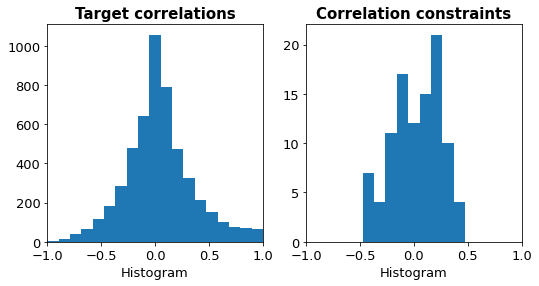

In [8]:
#we prepare the objective column
communities_and_crime_v2['y'] = communities_and_crime_v2['murders']
#we drop murders
communities_and_crime_v2 = communities_and_crime_v2.drop('murders',axis=1)
communities_and_crime_v2['y'] = (communities_and_crime_v2['y'] > 0).astype(int)

plot_correlations(communities_and_crime_v2)



In [9]:
# Shuffle the dataset.
np.random.seed(0)
shuffled_idxs = np.random.permutation(len(communities_and_crime_v2))
communities_and_crime_v2 = communities_and_crime_v2.iloc[shuffled_idxs]
#print(communities_and_crime_v2.head())

save_dir = os.path.join(f'{datasets_dir}/communities_and_crime_v2')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
communities_and_crime_v2.to_csv(f'{save_dir}/dataset.csv', index=False)

In [10]:
print(len(communities_and_crime_v2))
for column in communities_and_crime_v2.columns:
    print(column)

2215
population
householdsize
racepctblack
racePctWhite
racePctAsian
racePctHisp
agePct12t21
agePct12t29
agePct16t24
agePct65up
numbUrban
pctUrban
medIncome
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
medFamInc
perCapInc
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
HispPerCap
NumUnderPov
PctPopUnderPov
PctLess9thGrade
PctNotHSGrad
PctBSorMore
PctUnemployed
PctEmploy
PctEmplManu
PctEmplProfServ
PctOccupManu
PctOccupMgmtProf
MalePctDivorce
MalePctNevMarr
FemalePctDiv
TotalPctDiv
PersPerFam
PctFam2Par
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMomYoungKids
PctWorkMom
NumKidsBornNeverMar
PctKidsBornNeverMar
NumImmig
PctImmigRecent
PctImmigRec5
PctImmigRec8
PctImmigRec10
PctRecentImmig
PctRecImmig5
PctRecImmig8
PctRecImmig10
PctSpeakEnglOnly
PctNotSpeakEnglWell
PctLargHouseFam
PctLargHouseOccup
PersPerOccupHous
PersPerOwnOccHous
PersPerRentOccHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
MedNumBR
HousVacant
PctHousOccup
PctHousOwnOcc
PctVacantBoarded
P

# Step 2 - Fifa19 dataset

Download the dataset from https://www.kaggle.com/datasets/javagarm/fifa-19-complete-player-dataset and save it under the ../datasets/fifa19 directory.

In [11]:
fifa19_v2 = pd.read_csv(f'{datasets_dir}/fifa19/kl.csv', encoding='ISO-8859-1')
fifa19_v2.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [12]:
print(fifa19_v2.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [13]:
#We erase all categorical variable, then erase them
categorical_columns = ['Unnamed: 0', 'ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', \
                       'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until']
fifa19_v2 = fifa19_v2.drop(categorical_columns,axis=1)
#We erase predictive column that we don't want 
other_predictive_columns = ['Wage', 'Release Clause']
fifa19_v2 = fifa19_v2.drop(other_predictive_columns,axis=1)

In [14]:
def value_split(x):
    try:
        if 'M' in x:
            return float(x.split("M")[0][1:])
        elif 'K' in x:
            return float(x.split("K")[0][1:])/1000
    except:
        return 0
    
def height_split(x):
    try:
        if '\'' in x:
            return float(float(x.split('\'')[0])*30.46 + float(x.split('\'')[1])*2.54) # feet and inches to cms
    except: 
        return 0

def weight_split(x):
    try:
        if 'lbs' in x:
            return float(float(x.split('lbs')[0])*0.453592) #lbs to kgs
    except: 
        return 0
    
def plus_split(x):
    try:
        if '+' in x:
            return float(float(x.split('+')[0]) + float(x.split('+')[1]))
    except: 
        return 0
    
#we write the y column in a correct maner
fifa19_v2['y'] = fifa19_v2['Value']
fifa19_v2 = fifa19_v2.drop(columns=['Value'])
fifa19_v2['y'] = fifa19_v2['y'].apply(lambda x : value_split(x))
#we erase every record containing nan
index_with_nan = fifa19_v2.index[fifa19_v2.isnull().any(axis=1)]
print(len(index_with_nan))
fifa19_v2 = fifa19_v2.drop(index_with_nan, axis=0)
#we write the height column in a correct maner (in cm)
fifa19_v2['Height'] = fifa19_v2['Height'].apply(lambda x : height_split(x))
#we write the weight column in a correct maner (in kgs)
fifa19_v2['Weight'] = fifa19_v2['Weight'].apply(lambda x : weight_split(x))
#stats columns without +
for column in ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM','RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM','RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']:
    fifa19_v2[column] = fifa19_v2[column].apply(lambda x : plus_split(x))
print('Median value', fifa19_v2['y'].median())
print('Number of records labeled with 1 (whose value is > the median)', len(fifa19_v2[fifa19_v2['y'] > 0.74]))
fifa19_v2['y'] = (fifa19_v2['y'] > 0.75).astype(int)
print(len(fifa19_v2))
print(len(fifa19_v2.columns))

2290
Median value 0.75
Number of records labeled with 1 (whose value is > the median) 7998
15917
70


In [15]:
tuples = []
for i, column in enumerate(fifa19_v2.columns):
    for j, column2 in enumerate(fifa19_v2.columns):
        if i <= j:
            continue
        if fifa19_v2[column].equals(fifa19_v2[column2]) :
            tuples.append((column,column2))
tuples.sort()
print(tuples)

[('CAM', 'LAM'), ('CB', 'LCB'), ('CDM', 'LDM'), ('CF', 'LF'), ('CM', 'LCM'), ('RAM', 'CAM'), ('RAM', 'LAM'), ('RB', 'LB'), ('RCB', 'CB'), ('RCB', 'LCB'), ('RCM', 'CM'), ('RCM', 'LCM'), ('RDM', 'CDM'), ('RDM', 'LDM'), ('RF', 'CF'), ('RF', 'LF'), ('RM', 'LM'), ('RS', 'LS'), ('RS', 'ST'), ('RW', 'LW'), ('RWB', 'LWB'), ('ST', 'LS')]


In [16]:
#we remove duplicate columns
duplicates = ['LAM','RAM','LCB','RCB','RDM','LDM','RS','ST','RW','RM','LF','RF','LCM','RCM','RB','RWB']
fifa19_v2 = fifa19_v2.drop(duplicates,axis=1)
print(len(duplicates))

16


Found corr > 0.9 0.9684054923891922 CF LS
Found corr > 0.9 0.9288074154393547 CAM LS
Found corr > 0.9 0.9840777989497672 CAM LW
Found corr > 0.9 0.9003641279536996 LM LS
Found corr > 0.9 0.9884742593062321 LM LW
Found corr > 0.9 0.9695964239254913 LM CF
Found corr > 0.9 0.9468077315866259 CM Special
Found corr > 0.9 0.902775817971132 CM CAM
Found corr > 0.9 0.981719875451175 LB LWB
Found corr > 0.9 0.9303889373116135 CB CDM
Found corr > 0.9 0.9185152799887173 ShortPassing CM
Found corr > 0.9 0.9373947343200739 Dribbling LW
Found corr > 0.9 0.9134459273096475 Dribbling CF
Found corr > 0.9 0.9142427842144557 Dribbling CAM
Found corr > 0.9 0.9249994979755624 Dribbling LM
Found corr > 0.9 0.9007096219676011 BallControl LW
Found corr > 0.9 0.9039548765354416 BallControl CF
Found corr > 0.9 0.9242266987699654 BallControl CAM
Found corr > 0.9 0.9136055902967875 BallControl LM
Found corr > 0.9 0.9398976646382259 Interceptions CB
Found corr > 0.9 0.9023928839970656 Marking CB
Found corr > 0.9 0

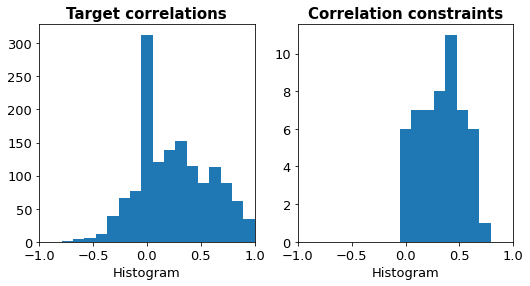

In [17]:
plot_correlations(fifa19_v2)

In [18]:
# Shuffle the dataset.
np.random.seed(0)
shuffled_idxs = np.random.permutation(len(fifa19_v2))
fifa19_v2 = fifa19_v2.iloc[shuffled_idxs]
print(fifa19_v2.head())

save_dir = os.path.join(f'{datasets_dir}/fifa19_v2')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
fifa19_v2.to_csv(f'{save_dir}/dataset.csv', index=False)

        Age  Overall  Potential  Special  International Reputation  Weak Foot  \
2731   26.0     73.0         73     1806                       1.0        3.0   
9389   24.0     66.0         69     1631                       1.0        3.0   
6210   37.0     69.0         69     1497                       2.0        3.0   
13576  33.0     62.0         62     1156                       1.0        3.0   
11280  25.0     64.0         69     1560                       1.0        4.0   

       Skill Moves  Height     Weight    LS  ...  Composure  Marking  \
2731           2.0  177.70  73.028312  60.0  ...       73.0     67.0   
9389           2.0  172.62  68.038800  51.0  ...       56.0     72.0   
6210           2.0  190.38  83.914520  48.0  ...       69.0     72.0   
13576          2.0  192.92  92.986360  41.0  ...       41.0     63.0   
11280          2.0  177.70  69.853168  49.0  ...       46.0     64.0   

       StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
2731   

# 3 - Musk

Download the dataset from https://archive.ics.uci.edu/ml/datasets/Musk+(Version+2) and save it under the ```../datasets/musk``` directory.

In [19]:
all_columns = ['molecule_name', 'conformation_name']+['f'+str(i) for i in range(1, 167)] + ['musk']

musk = pd.read_csv(f'{datasets_dir}/musk/clean2.data', names=all_columns)
print('Dataset length', len(musk))
musk = musk.drop(['molecule_name', 'conformation_name'], axis=1)

index_with_nan = musk.index[musk.isnull().any(axis=1)]
print('Number of NaN values', len(index_with_nan))

Dataset length 6598
Number of NaN values 0


In [20]:
X_cols = all_columns[2:-1]
musk['y'] = musk['musk']
musk.drop(columns=['musk'])
musk = musk[X_cols + ['y']]
musk.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,y
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1.0


Found corr > 0.9 0.9282558716959902 f22 f7
Found corr > 0.9 0.907012076311112 f22 f9
Found corr > 0.9 0.9240165930055073 f34 f30
Found corr > 0.9 0.9014314177731352 f41 f3
Found corr > 0.9 0.9397342688343469 f44 f11
Found corr > 0.9 0.9646246119511966 f44 f14
Found corr > 0.9 0.9426145696829156 f44 f15
Found corr > 0.9 0.953072340004814 f45 f14
Found corr > 0.9 0.910987073386517 f45 f15
Found corr > 0.9 0.9290357079393082 f46 f11
Found corr > 0.9 0.9722565561878951 f52 f9
Found corr > 0.9 0.9678004427776312 f52 f22
Found corr > 0.9 0.9486235008616424 f53 f7
Found corr > 0.9 0.9540013212910341 f53 f22
Found corr > 0.9 0.9366739736126026 f53 f26
Found corr > 0.9 0.9479803069849194 f57 f7
Found corr > 0.9 0.9261645900225595 f60 f30
Found corr > 0.9 0.9415529611699229 f64 f30
Found corr > 0.9 0.9607067934759602 f71 f3
Found corr > 0.9 0.9802660107045066 f71 f41
Found corr > 0.9 0.9255951079188943 f73 f11
Found corr > 0.9 0.921252951625084 f74 f14
Found corr > 0.9 0.9716174644940432 f74 f45

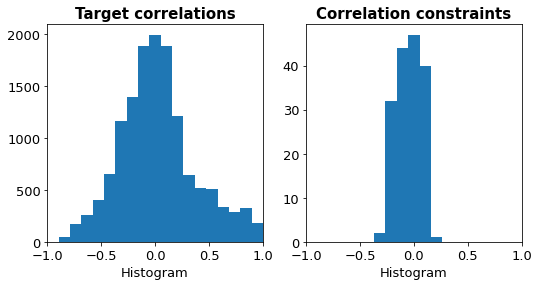

In [21]:
plot_correlations(musk)

1017 5581
2034
Found corr > 0.9 0.9238746180426636 f22 f7
Found corr > 0.9 0.9057722688198023 f22 f9
Found corr > 0.9 0.9349065191460011 f34 f30
Found corr > 0.9 0.9463731558800209 f44 f11
Found corr > 0.9 0.9700698412588455 f44 f14
Found corr > 0.9 0.9473340741628774 f44 f15
Found corr > 0.9 0.9548364217954741 f45 f14
Found corr > 0.9 0.9200760769661999 f45 f15
Found corr > 0.9 0.9290329307128564 f46 f11
Found corr > 0.9 0.9716961496760218 f52 f9
Found corr > 0.9 0.9675198589352875 f52 f22
Found corr > 0.9 0.9448816658634268 f53 f7
Found corr > 0.9 0.9477886790136849 f53 f22
Found corr > 0.9 0.9291249644657427 f53 f26
Found corr > 0.9 0.946145777018372 f57 f7
Found corr > 0.9 0.9333235835779352 f60 f30
Found corr > 0.9 0.9052768110934478 f60 f34
Found corr > 0.9 0.9483085505869849 f64 f30
Found corr > 0.9 0.9026440729568374 f64 f34
Found corr > 0.9 0.9007954435980139 f70 f68
Found corr > 0.9 0.9630197228499077 f71 f3
Found corr > 0.9 0.9773871593661358 f71 f41
Found corr > 0.9 0.93291

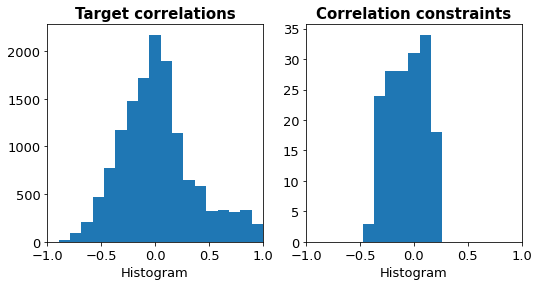

In [22]:
musk_pos = musk[musk['y']==1]
musk_neg = musk[musk['y']==0]
print(len(musk_pos), len(musk_neg))
balanced_musk = pd.concat([musk_pos, musk_neg.sample(len(musk_pos), replace=False)])
print(len(balanced_musk))
plot_correlations(balanced_musk)

In [23]:
balanced_musk = balanced_musk.sample(frac=1, replace=False, random_state=0)
balanced_musk.to_csv(f'{datasets_dir}/musk/dataset.csv', index=False)